#                                      data Science Salary Analysis
![image.jpg](https://deeptechbytes.com/wp-content/uploads/2021/05/data-analytics.jpg)

# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✔️ Libraries imported")

✔️ Libraries imported


## Read DataSet

In [31]:
df = pd.read_csv("salaries.csv")

### **Dataset description**
The dataset contains 11 columns with the following characteristics:

1. **work_year**: The year the salary was paid.

2. **experience_level**: The experience level in the job during the year with the following possible values:
  - EN: Entry-level / Junior
  - MI: Mid-level / Intermediate
  - SE: Senior-level / Expert
  - EX: Executive-level / Director

3. **employment_type**: The type of employement for the role:
  - PT: Part-time
  - FT: Full-time
  - CT: Contract
  - FL: Freelance

4. **job_title**: The role worked in during the year.

5. **salary**: The total gross salary amount paid.

6. **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.

7. **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate of respective year via data from fxdata.foorilla.com).

8. **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.

9. **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
  - 0: No remote work (less than 20%)
  - 50: Partially remote/hybrid
  - 100: Fully remote (more than 80%)

10. **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.

11. **company_size**: The average number of people that worked for the company during the year:
  -S: less than 50 employees (small)
  -M: 50 to 250 employees (medium)
  -L: more than 250 employees (large)

In [3]:
# shape
# info
# describe
# missing values

In [32]:
# checking that is there any null values in data set 
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [33]:
# checking the unique values in each columns count of unique values

a = list(df.describe(include = 'object').columns)

for i in a:
    b = df[i].unique()
    print(i,b,"count:-",len(b))
    print("\t")

experience_level ['EN' 'SE' 'MI' 'EX'] count:- 4
	
employment_type ['FT' 'CT' 'PT' 'FL'] count:- 4
	
job_title ['Admin & Data Analyst' 'Data Management Specialist' 'Data Scientist'
 'Data Product Manager' 'Data Engineer' 'Data Analyst' 'Data Architect'
 'Machine Learning Engineer' 'Data Science' 'ML Engineer' 'Data Manager'
 'Research Engineer' 'Data Analytics Consultant' 'Research Scientist'
 'Applied Scientist' 'Analytics Engineer' 'Business Intelligence Engineer'
 'Data Science Engineer' 'AI Engineer' 'Business Intelligence Manager'
 'Data Specialist' 'Machine Learning Scientist'
 'Data Integration Specialist' 'Research Analyst'
 'Data Analytics Specialist' 'Business Intelligence Analyst'
 'Lead Data Analyst' 'Data Operations Analyst' 'Data Management Analyst'
 'Data Science Consultant' 'Data Science Manager'
 'Business Intelligence Developer' 'Head of Data' 'Prompt Engineer'
 'Data Science Director' 'Data Modeler' 'Data Lead' 'Data Science Lead'
 'Data Operations Associate' 'Data D

## Observation

## Data Cleaning

### make a new column named "job_title_cleaned" and merge the overlapping jab titles with each other 

In [34]:
title = df.job_title.unique()

# found the over lapping job title of analyst
find = ["analy","bi"]
data_analyst = []

for i in find:
    for j in title:
        if i in j.lower():
            data_analyst.append(j)
            

# remove the job title that is not in catagory data analyst 
rem_title_list_analyst = ['Analytics Engineering Manager','Big Data Engineer',
 'BI Data Engineer',
 'Big Data Architect']

data_analyst = list(set(data_analyst) - set(rem_title_list_analyst))
            
            


In [35]:
# found the over lapping job title of data scientest

find_sci = ["scien"]
data_sci = []

for i in find_sci:
    for j in title:
        if i in j.lower():
            data_sci.append(j)



In [36]:
# lay of the found job title from title list so we can easyly found the more overlapping job title without any problem 
title = list(set(title) - set(data_analyst))
title = list(set(title) - set(data_sci))


In [37]:
# found the over lapping job title of data enginner
find_eng = ["engi"]
data_eng = []

for i in find_eng:
    for j in title:
        if i in j.lower():
            data_eng.append(j)
            
remove_list = ['Computer Vision Software Engineer','Deep Learning Engineer','Computer Vision Engineer',
 'Prompt Engineer','NLP Engineer'] 

data_eng = list(set(data_eng) - set(remove_list))


In [38]:
# remove data_enginner jobs from title list 
title = list(set(title) - set(data_eng))

In [39]:
# titles that are still in title columns lay off them in 3 job title grups 
# data_analyst
# data_sci
# data_eng

ds = ['AI Developer','Computer Vision Engineer','Machine Learning Specialist','Machine Learning Researcher','Deep Learning Researcher',
      'Head of Machine Learning','Machine Learning Manager','Machine Learning Developer','NLP Engineer',
 'Machine Learning Modeler','Computer Vision Software Engineer', 'Deep Learning Engineer',]

da = ['Business Intelligence Specialist', 'Data Visualization Specialist','Business Intelligence Manager','Business Intelligence Developer',]

de = [ 'Data Operations Associate','Data Integration Specialist','Data Modeller','Data Operations Specialist',
      'Big Data Architect','Principal Data Architect',
 'AWS Data Architect',
 'Data Operations Manager','Data Modeler','ETL Developer','AI Architect',
 'Cloud Data Architect','Data Architect',]


In [40]:
data_analyst.extend(da)
data_sci.extend(ds)
data_eng.extend(de)

In [41]:
title = set(title) - set(da)
title = set(title) - set(ds)
title = list(set(title) - set(de))

In [47]:
print(len(data_analyst))
print(len(data_sci))
print(len(data_eng))
print(len(title))

35
37
47
15


### add a new column in data frame name job_title_cleaned 
### and add the new job title bassed on (in which category the are) 
### data analyst
### data scientist
### data engineer

In [48]:
# use where function to replace the values 
# where job title math in the list of data analyst , scientest or enmginner  replace the value with name data analyst scientest or enginner bassed in which list the 
# job title found 
job_title = np.where(df.job_title.isin(data_analyst),"Data Analyst",np.where(df.job_title.isin(data_sci),"Data Scientest",np.where(df.job_title.isin(data_eng),"Data enginner",df.job_title)))

In [49]:
# insert the new colum with the array that is given by where condition at the specified location 4
df.insert(4,"job_title_cleaned",job_title)

In [56]:
#drop the old job title column
df= df.drop(columns = ['job_title'])

# rename the job_title_cleaned column with job_title
df = df.rename(columns = {'job_title_cleaned':'job_title'})
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,50000,USD,50000,DE,0,DE,M
1,2024,SE,FT,Data Management Specialist,200400,USD,200400,US,0,US,M
2,2024,SE,FT,Data Management Specialist,116500,USD,116500,US,0,US,M
3,2024,SE,FT,Data Scientest,188500,USD,188500,US,0,US,M
4,2024,SE,FT,Data Scientest,165100,USD,165100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
11565,2020,SE,FT,Data Scientest,412000,USD,412000,US,100,US,L
11566,2021,MI,FT,Data Scientest,151000,USD,151000,US,100,US,L
11567,2020,EN,FT,Data Scientest,105000,USD,105000,US,100,US,S
11568,2020,EN,CT,Data Analyst,100000,USD,100000,US,100,US,L


# questions 

1.  entry level average salary gloabl vs india for analyst, scientist and engineer
2. year wise comparision of average salary of data scientist
3. comparision bw average salary of data engineer and data scientist
4. salary distribution wrt company size
5. average salary of da, ds, de based on employment type
6. top 5 countries on the basis of average salary for indian employees.
7. average salary of da, ds, de based on experiance level
8. How Many employees work from over see year on year 
9. year wise comparision number of employees on remote job
10. year on year growth for da, ds,de
11. average salary of da,ds,de based on company size


### Q1. entry level average salary gloabl vs india for analyst, scientist and engineer

In [58]:
# found the avg salay out of ind
mask = ((df.experience_level == "EN") & (df.company_location != "IN") & (df.job_title.isin(['Data Analyst', 'Data Scientest','Data enginner'])))
global_level = df[mask].pivot_table(index = 'job_title', values = 'salary_in_usd', aggfunc = "mean")

In [59]:
# found avg salary in ind 
mask1 = ((df.experience_level == "EN") & (df.company_location == "IN") & (df.job_title.isin(['Data Analyst', 'Data Scientest','Data enginner'])))
ind_level = df[mask1].pivot_table(index = 'job_title', values = 'salary_in_usd', aggfunc = "mean")

In [60]:
# merge both dataframe
exp_df = pd.merge(global_level,ind_level, left_index = True, right_index = True)
exp_df = exp_df.rename(columns = {"salary_in_usd_x":"Avg_salary_oth","salary_in_usd_y":"Avg_salary_IND"})

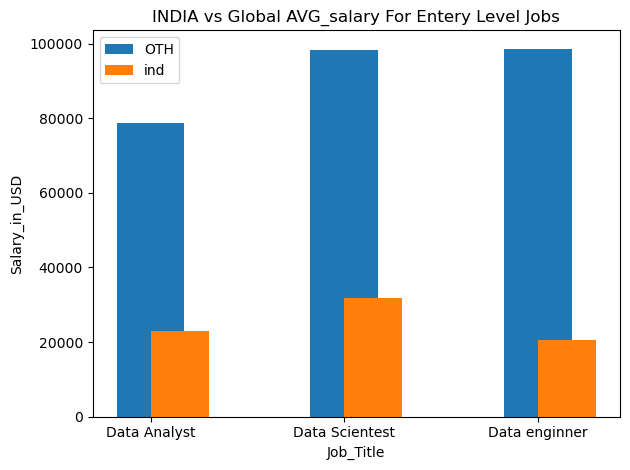

In [62]:
plt.bar(exp_df.index,exp_df.Avg_salary_oth, label = "OTH", width = 0.35)
plt.bar(exp_df.index,exp_df.Avg_salary_IND, align = "edge",label = "ind", width = 0.30)

plt.title("INDIA vs Global AVG_salary For Entery Level Jobs")
plt.xlabel("Job_Title")
plt.ylabel("Salary_in_USD")
plt.legend()
plt.tight_layout()


### conclusion 

* The entry-level average salary for analysts, scientists, and engineers is higher globally compared to India.
* This suggests that these roles may have a more competitive compensation structure on a global scale, possibly due to differences in cost of living and demand for these skills.

### Q2. year wise comparision of average salary of data scientist

In [63]:
mask  = df.job_title == "Data Scientest"
q2 = df[mask].pivot_table(index = "work_year", values = "salary_in_usd", aggfunc = "mean").rename(columns = {"salary_in_usd":"Data_Scientest_avg_salary"})

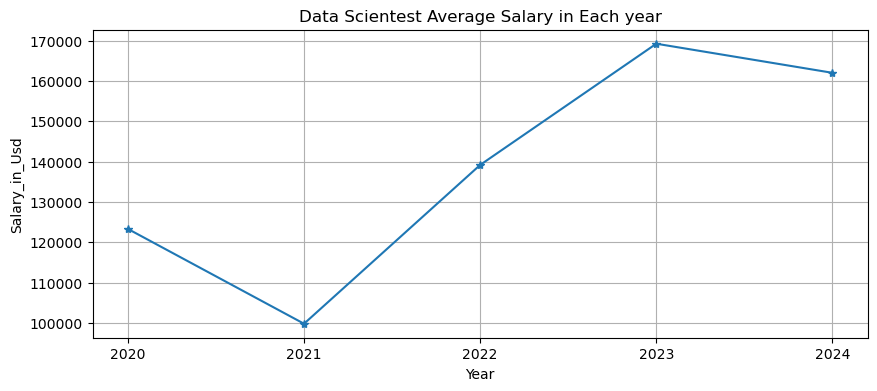

In [64]:
plt.figure(figsize = (10,4))
plt.plot(q2.index,q2.Data_Scientest_avg_salary, marker = "*")
plt.xticks(q2.index)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Salary_in_Usd")
plt.title("Data Scientest Average Salary in Each year")


plt.show()

### conclusion 

* The average salary trend for data scientists dipped in 2021, possibly due to global events like the COVID-19 pandemic and economic recession. It's important to recognize these external factors as potential reasons for the temporary decrease in salaries during that year

* Data scientists' average salaries have generally been going up each year. But in 2024, the trend seems lower. It's essential to understand that this might be because we don't have all the data for 2024 just yet.

* This could indicate a growing demand for data scientists.

### Q3.comparision bw average salary of data engineer and data scientist

In [65]:
xdf = pd.crosstab(index = df.job_title, values = df.salary_in_usd , columns = "Avg_salary", aggfunc = "mean")
a = xdf.loc[["Data enginner", "Data Scientest"]]

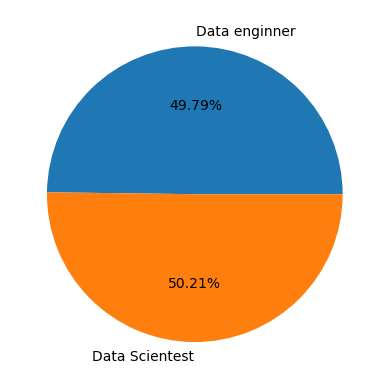

In [66]:
plt.pie(x = a.Avg_salary, labels = a.index, autopct = "%1.2F%%")
plt.show()

### conclusion

* Data scientists have a higher average salary compared to data engineers.
* This could reflect the specialized skills and expertise required for data science roles, leading to higher compensation

### Q4. salary distribution wrt company size

In [67]:
m = df[df.company_size == "M"]
l = df[df.company_size == "L"]
s = df[df.company_size == "S"]

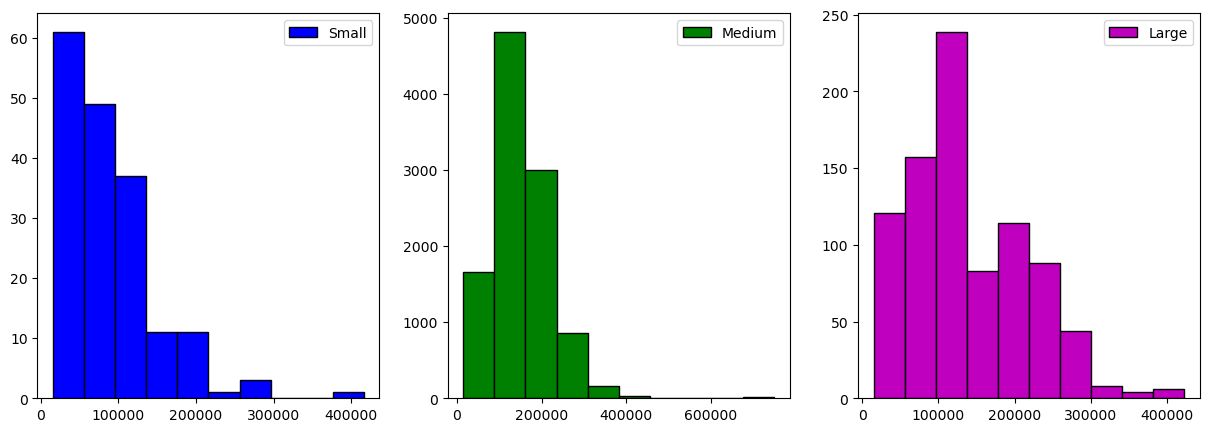

In [321]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].hist(s.salary_in_usd, bins = 10, edgecolor = "black", label = "Small", color = "b")
ax[0].legend()


ax[1].hist(m.salary_in_usd, bins = 10,edgecolor = "black", label = "Medium", color = "g")
ax[1].legend()

ax[2].hist(l.salary_in_usd, bins = 10,edgecolor = "black", label = "Large", color = "m")
ax[2].legend()


### conclusion 

* After looking into things, I found that big companies generally pay higher salaries.But what's interesting is that medium-sized companies pay salaries to more people. In the range of 10 to 20, the most employees getting paid are in medium-sized companies compared to others.

### Q5. average salary of da, ds, de based on employment type

In [68]:
ee = df[df.job_title.isin(['Data Analyst', 'Data Scientest', 'Data enginner'])].groupby(['employment_type','job_title']).agg({"salary_in_usd":"mean"}).reset_index()

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

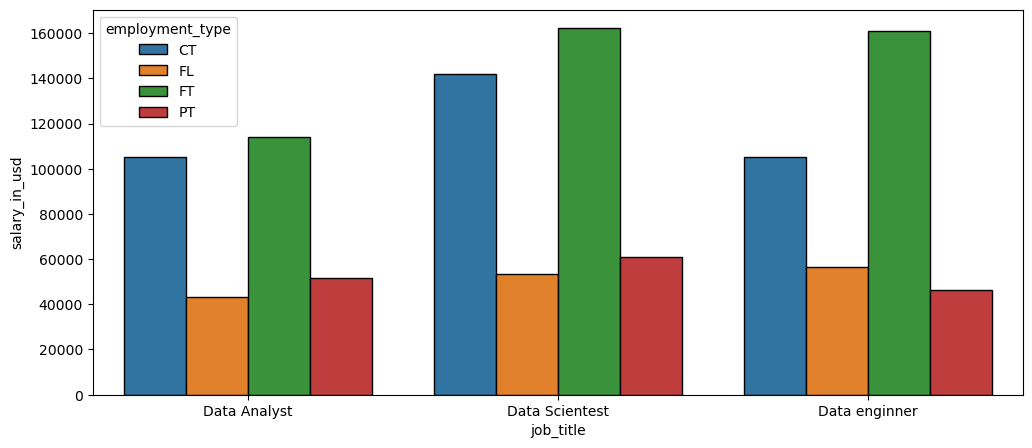

In [69]:
plt.figure(figsize = (12,5))
sns.barplot(ee, x = "job_title", y = 'salary_in_usd', hue = "employment_type", edgecolor = "black")

### conclusion 

* In my findings, I discovered that full-time (FT) employees receive the highest average salary in each category, whether it's Data Analysts, Data Scientists, or Engineers. Following that, contract-based employees have the next highest average, while part-time (PT) and freelancer (FL) roles have approximately the same average salary

### Q6. top 5 countries on the basis of average salary for indian employees.

In [72]:
mm = df[df.employee_residence == "IN"].pivot_table(index = "company_location", values = "salary_in_usd", aggfunc = "mean").sort_values(["salary_in_usd"], 
                                                                                                                                  ascending = False).head(5)

Text(0.5, 1.0, 'Top 5 countries for Indains Based on Avg_salary')

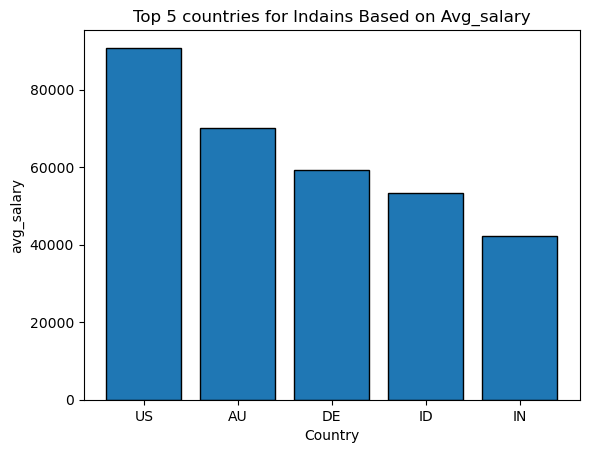

In [139]:
plt.bar(mm.index,mm.salary_in_usd, edgecolor = "black")
plt.xlabel("Country")
plt.ylabel("avg_salary")
plt.title("Top 5 countries for Indains Based on Avg_salary")

### conclusion

* Indian employees receive varying average salaries when working abroad, with the top five countries offering the highest compensation.
* This information can be valuable for professionals considering opportunities abroad and seeking competitive salaries

### 7. average salary of da, ds, de based on experiance level

In [78]:
pp= df[df.job_title.isin(['Data Analyst', 'Data Scientest', 'Data enginner'])].groupby(['experience_level','job_title']).agg({"salary_in_usd":"mean"}).reset_index()

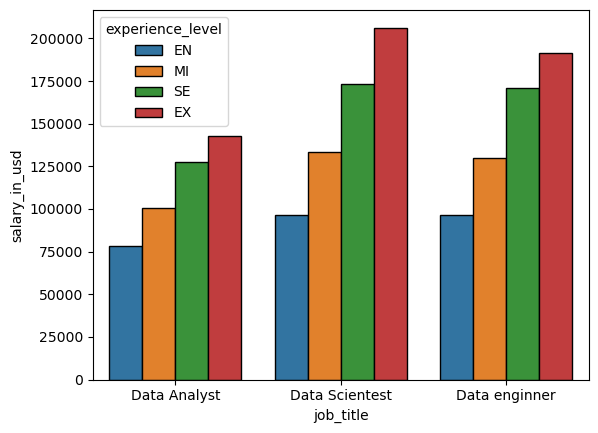

In [141]:
sns.barplot(pp, x = "job_title", y = "salary_in_usd", hue = "experience_level", edgecolor = "black", hue_order = ["EN","MI","SE","EX"])
plt.show()

### conclusion

In my analysis, experience levels are  Entry Level (En), Mid Level (Mi), Senior Level (Se), and Executive (Ex) for each job category (Data Analysts, Data Scientists, and Data Engineers). The findings consistently show that Executives (Ex) receive the highest salary, followed by Senior Level (Se), Mid Level (Mi), and then Entry Level (En) across all job categories.

### 8. How Many employees work from over see Year on year


In [84]:
xx = df[df.employee_residence != df.company_location].pivot_table(index = "work_year", values = "salary", aggfunc = 'count').rename(columns = {"salary":"oversee_employees"})

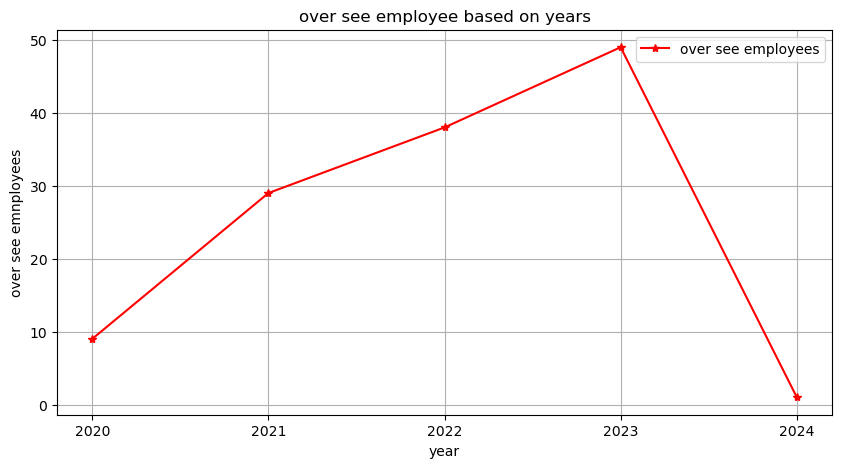

In [87]:
plt.figure(figsize = (10,5))
plt.plot(xx.index, xx.oversee_employees, label = "over see employees", color = "red", marker = "*")
plt.xlabel("year")
plt.ylabel("over see emnployees")
plt.title("over see employee based on years")
plt.legend()
plt.xticks(xx.index)
plt.grid()
plt.show()

### conclusion 

* The data suggests a year-on-year increase in the number of employees working overseas. This might indicate a growing trend in global workforce mobility, 
showing that more employees are willing to take on international assignments. One contributing factor could be the competitive salary structures offered for such roles.

* The trend appears lower in 2024, possibly because we don't have the complete data for the year yet.

### 9. year wise comparision number of employees on remote job

In [88]:
bb = df[df.remote_ratio == 100].pivot_table(index = "work_year", values = "salary", aggfunc = 'count').rename(columns = {"salary":"remote_jobs"})

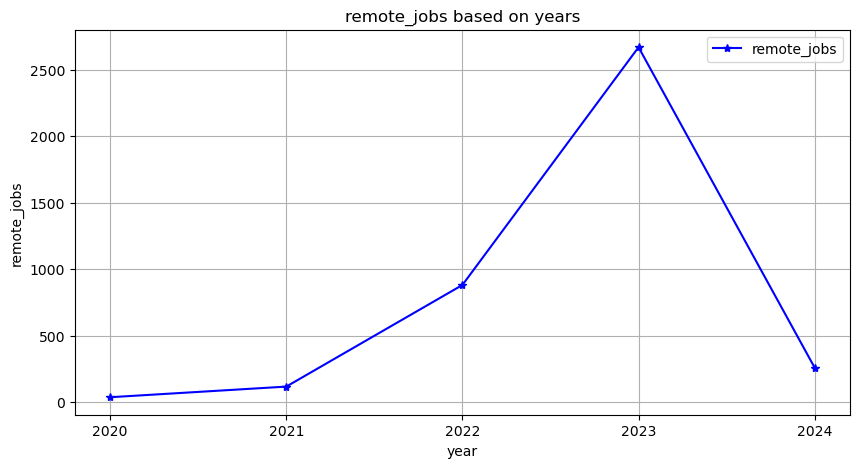

In [89]:
plt.figure(figsize = (10,5))
plt.plot(bb.index, bb.remote_jobs, label = "remote_jobs", color = "blue", marker = "*")
plt.xlabel("year")
plt.ylabel("remote_jobs")
plt.title("remote_jobs based on years")
plt.legend()
plt.xticks(xx.index)
plt.grid()
plt.show()

### conclusion 

* The comparison provides insights into the growth or decline of remote job opportunities over the years.
* This information is crucial in understanding the evolving nature of remote work and its prevalence in the job market

### 10. year on year growth for da, ds,de

####  Year on Year Growth Of Data Analyst

In [96]:

oo = df[df.job_title == "Data Analyst"].pivot_table(index = "work_year", values = "salary_in_usd", 
                                                    aggfunc = "mean").rename(columns = {'salary_in_usd':'Data_analyst_avg_salary'})

# round the avg salary of data analyst
oo.Data_analyst_avg_salary =round(oo.Data_analyst_avg_salary,0)

# found the gwroth ratio of data_analyst avg salary year on year 
list1 = []
base = 0
for i in oo.Data_analyst_avg_salary:
    gr = i-base
    if base == 0:
        base = i
    
    ratio = gr/base * 100
    list1.append(round(ratio,2))
    base = i
    
oo["GR_ratio"] = list1
oo

,Data_analyst_avg_salary,GR_ratio
work_year,,
2020,68015.0,100.00
2021,85159.0,25.21
2022,112553.0,32.17
2023,115238.0,2.39
2024,111981.0,-2.83


####  Year on Year Growth Of Data Scientest

In [98]:
os = df[df.job_title == "Data Scientest"].pivot_table(index = "work_year", values = "salary_in_usd", 
                                                      aggfunc = "mean").rename(columns = {'salary_in_usd':'Data_Scientest_avg_salary'})

# round the avg salary of data scientest
os.Data_Scientest_avg_salary =round(os.Data_Scientest_avg_salary,0)

# found the growth ratio of data_scientest avg salary year on year 

list1 = []
base = 0
for i in os.Data_Scientest_avg_salary:
    gr = i-base
    if base == 0:
        base = i
    
    ratio = gr/base * 100
    list1.append(round(ratio,2))
    base = i
    
os["GR_ratio"] = list1
os

,Data_Scientest_avg_salary,GR_ratio
work_year,,
2020,123310.0,100.00
2021,99788.0,-19.08
2022,139186.0,39.48
2023,169262.0,21.61
2024,162042.0,-4.27


####  Year on Year Growth Of Data enginner

In [103]:
oe = df[df.job_title == "Data enginner"].pivot_table(index = "work_year", values = "salary_in_usd", 
                                                      aggfunc = "mean").rename(columns = {'salary_in_usd':'Data_enginner_avg_salary'})

# round the avg salary of data enginner
oe.Data_enginner_avg_salary =round(oe.Data_enginner_avg_salary,0)

# found the growth ratio of data_enginner avg salary year on year 

list1 = []
base = 0
for i in oe.Data_enginner_avg_salary:
    gr = i-base
    if base == 0:
        base = i
    
    ratio = gr/base * 100
    list1.append(round(ratio,2))
    base = i
    
oe["GR_ratio"] = list1
oe

,Data_enginner_avg_salary,GR_ratio
work_year,,
2020,93310.0,100.00
2021,103473.0,10.89
2022,142876.0,38.08
2023,164140.0,14.88
2024,171851.0,4.70


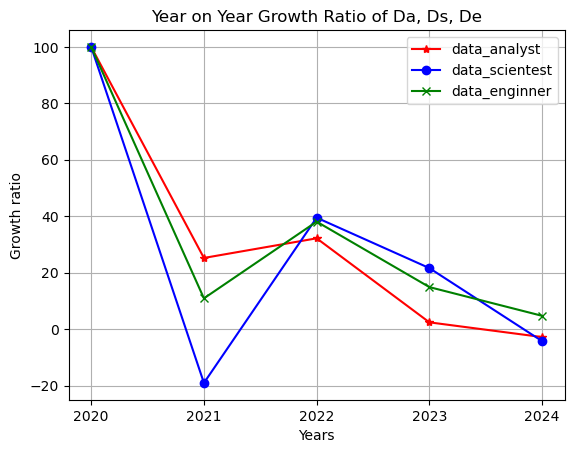

In [110]:
plt.plot(oo.index,oo.GR_ratio, marker = "*" , color = "red", label = "data_analyst")
plt.plot(os.index,os.GR_ratio, marker = "o" , color = "blue", label = "data_scientest")
plt.plot(oe.index,oe.GR_ratio, marker = "x" , color = "green", label = "data_enginner")

plt.grid()
plt.xticks(oo.index)
plt.xlabel("Years")
plt.ylabel("Growth ratio")
plt.title("Year on Year Growth Ratio of Da, Ds, De")
plt.legend()
plt.show()

### conclusion

* The year-to-year growth for Data Analysts, Data Scientists, and Data Engineers shows that these jobs are in demand. But, it's interesting to see that the growth rate in 2022, 2023, and 2024 is not as much as it was in 2021. Although salaries are increasing each year, the speed of the increase is not as fast as it was in 2021.

### 11. average salary of da,ds,de based on company size

In [132]:
mask = df.job_title.isin(["Data Analyst", "Data Scientest", "Data enginner"])
arr = round(df[mask].groupby(["company_size", "job_title"]).agg({"salary_in_usd":"mean"}).reset_index(),2)

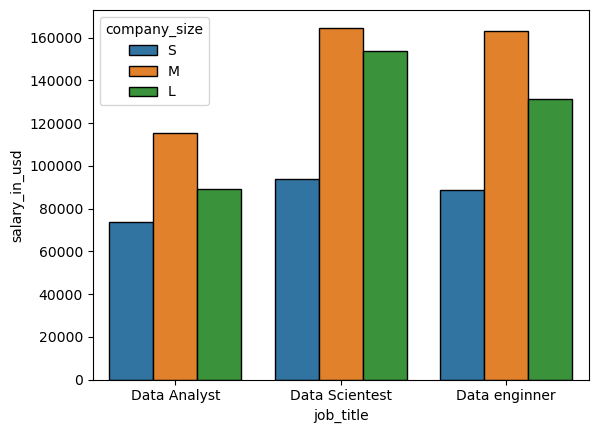

In [145]:
sns.barplot(arr, x = "job_title", y = "salary_in_usd", hue = "company_size", edgecolor = "black", hue_order= ["S","M","L"])
plt.show()

### conclusion 

* I found in my research, it's interesting to see that medium-sized companies pay more to Data Analysts, Data Scientists, and Engineers compared to big companies. Surprisingly, the smallest companies offer the lowest salaries in each job category.